# Project 2 - Wine Price Classification

**Introduction:**
For this project, I chose the Wine Dataset by Elvin Rustamov, which is a subset of wines from around the world.  
The objective of this project is to classify wines into price categories (Low, Medium, Premium) based on their features.  
This classification can help customers make more informed purchasing decisions, though it may oversimplify pricing by getting rid of factors such as marketing and branding.

**Dataset Information:**
The dataset is sourced from Kaggle and it contains various features related to wines, including their price, country, grape variety, and alcohol content. Below are the key features included in the dataset:

Dataset Columns:
- **Price**: The price of the wine per bottle. 
- **Capacity**: The size of the wine bottle (e.g., "75CL").
- **Grape**: The primary grape variety used in the wine.
- **Closure**: The type of bottle closure (e.g., Natural Cork, Screwcap).
- **Country**: The country of origin where the wine was produced.
- **Unit**: The unit of measure (if applicable) for certain features.
- **Type**: The wine type (e.g., Red, White, etc.).
- **ABV**: The Alcohol By Volume percentage, indicating the wine’s strength.
- **Region**: The wine-producing region, which may impact its style and quality.
- **Style**: A label of the wine’s style.
- **Vintage**: The production year of the wine or a designation like "NV" for non-vintage.


**Model Notes:**
For the classification task, I plan to use a RandomForestClassifier because it handles both numerical and categorical data well

## Importing Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

<br>

## Load Dataset

In [86]:
df = pd.read_csv('C:/Users/19857/OneDrive/Desktop/WineDataset.csv')
cols_to_drop = ['Title', 'Description', 'Characteristics', 'Per bottle / case / each', 
                'Appellation', 'Secondary Grape Varieties']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True, errors='ignore')

<br>

## Removes non-numeric characters and convert to float for the 'Price' column

- The 'Price' column contained currency symbols which prevented any mathematical operations to be done
- This removes the unnecessary characters so that the numeric value can be analyzed

In [88]:
df['Price'] = pd.to_numeric(df['Price'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

<br>


## Removes non-numeric characters and convert to float for 'Capacity' column
- The 'Capacity' column contained currency symbols which prevented any mathematical operations to be done
- This removes the unnecessary characters so that the numeric value can be analyzed

In [92]:
df['Capacity'] = pd.to_numeric(df['Capacity'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

<br>

## Removes non-numeric characters and convert to float for 'ABV' column
- The 'ABV' column contained currency symbols which prevented any mathematical operations to be done
- This removes the unnecessary characters so that the numeric value can be analyzed

In [96]:
df['ABV'] = pd.to_numeric(df['ABV'].astype(str).str.extract(r'([\d.]+)')[0], errors='coerce')

<br>

## Cleaning Data/Handling Null Values
- For text data columns, missing data is filled with the most common value.
- For numerical data columns, missing data is filled with the median of those columns.
- After filling, if the values are still null then they are removed to clean up the dataset. 

In [100]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

df.dropna(inplace=True)

print("Missing Values After Processing:\n", df.isnull().sum())

Missing Values After Processing:
 Price       0
Capacity    0
Grape       0
Closure     0
Country     0
Unit        0
Type        0
ABV         0
Region      0
Style       0
Vintage     0
dtype: int64


<br>

## Categorizing Wine Prices for Classification
This step divides the wines into three price categories based on their price:
- Wines priced 15 or less are categorized as "Low".
- Wines priced between 15 and 40 are categorized as "Medium".
- Wines priced over 40 are categorized as "Premium".


In [104]:
def categorize_price(price):
    if price <= 15:
        return "Low"
    elif price < 40:
        return "Medium"
    else:
        return "Premium"

df["Price_Category"] = df["Price"].apply(categorize_price)

<br>

## Encoding New Price Categories
- LabelEncoder() turns the column entries for "Price_Category" into numeric values so they can be used for machien learning later on.

In [108]:
label_encoder = LabelEncoder()
df["Price_Category_Encoded"] = label_encoder.fit_transform(df["Price_Category"])

<br>

# Understanding and Visualizing the Dataset:
## Initial Questions:
- **Class Distribution:** Are the wine prices distributed equally across the dataset or is there some imbalance?
- **Price Distribution:** Are the overall wine prices skewed and interfere with the categorization of the wines?
- **Wine Type & Price:** Is the wine price affected by different features such as Wine Type?

## Displays Overview

In [113]:
print("\nPrice Category Distribution:")
print(df["Price_Category"].value_counts())

print("\nDataset Preview:")
print(df.head())


Price Category Distribution:
Price_Category
Low        546
Medium     538
Premium    206
Name: count, dtype: int64

Dataset Preview:
   Price  Capacity            Grape       Closure      Country  Unit   Type  \
0   9.99      75.0      Tempranillo  Natural Cork        Spain  10.5    Red   
1  15.99      75.0       Chardonnay  Natural Cork          USA  10.1  White   
2  12.49      75.0  Sauvignon Blanc      Screwcap  New Zealand   9.8  White   
3  17.99      75.0       Chardonnay  Natural Cork       France  10.1  White   
4  15.99      75.0       Pinot Noir  Natural Cork          USA  10.1    Red   

    ABV       Region            Style Vintage Price_Category  \
0  14.0     Burgundy     Rich & Juicy      NV            Low   
1  13.5   California    Rich & Toasty    2021         Medium   
2  13.0  Marlborough    Crisp & Zesty    2022            Low   
3  13.5     Burgundy   Ripe & Rounded    2022         Medium   
4  13.5   California  Smooth & Mellow    2021         Medium   

   Pri

<br>

## Visualization 1: Histogram (Price Distribution)
### **Purpose**: Visualizes the overall distribution of wine prices
### **Insight**: Helps understand the skewness of the data that may affect the classification

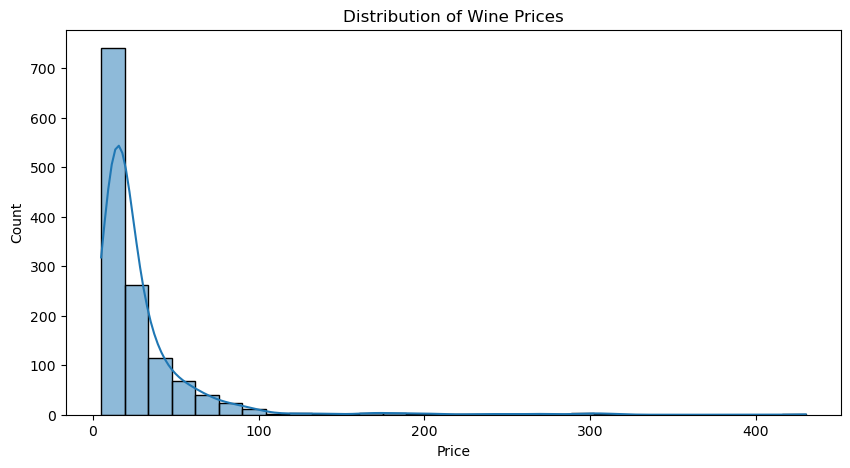

In [130]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

<br>

## Visualization 2: Countplot (Wine Price Categories)
### **Purpose**: Visualizes the overall distribution of wines across different price categories (Low, Medium, Premium).
### **Insight**: Allows to check for class imbalances that might need to be fixed in the model phase.

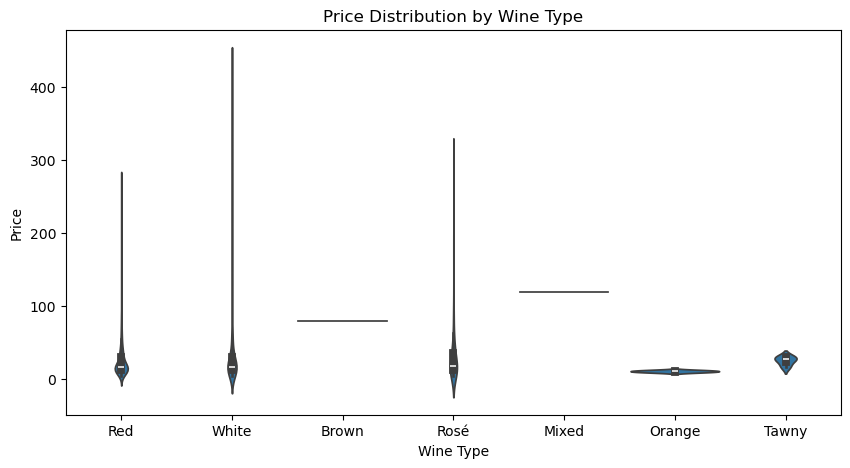

In [143]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Price_Category", data=df, order=["Low", "Medium", "Premium"])
plt.title("Count of Wines by Price Category")
plt.xlabel("Price Category")
plt.ylabel("Number of Wines")
plt.show()

<br>

## Visualization 3: Violin Plot (Price Distribution by Wine Type)
### **Purpose**: Explores and showcases how wine prices are affected by wine type (e.g. Red, White, Mixed, etc.)
### **Insight**: Allows to analyze which wine types tend to be more expensive than others. 

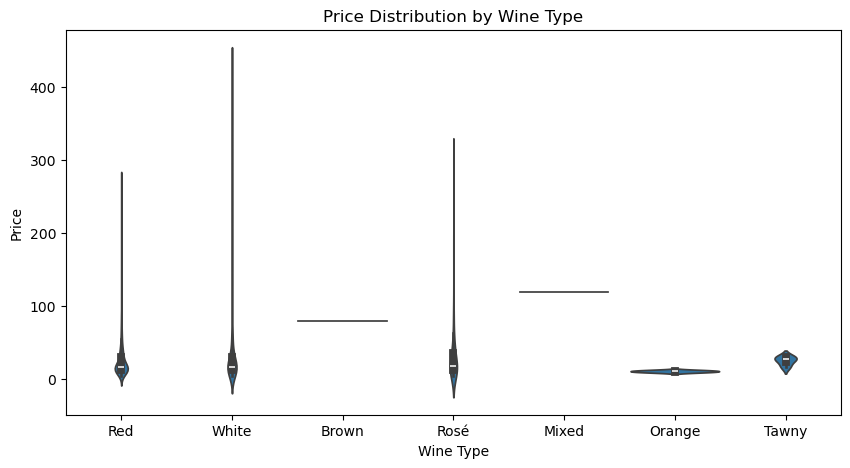

In [149]:
plt.figure(figsize=(10, 5))
sns.violinplot(x="Type", y="Price", data=df)
plt.title("Price Distribution by Wine Type")
plt.xlabel("Wine Type")
plt.ylabel("Price")
plt.show()

# Modeling
## RandomForestClassifier:
- **What is it?:** A machine learning algorithm that creates decision trees and makes predictions by averaging the results of the trees. 

- **How does it work?:** It builds multiple trees using different subsets from the main dataset and combines the results to train itself in 
    making predictions.
  
- **Why I chose it:** The wine dataset contains both numerical and categorical features which the RandomForestClassifer handles effectively. It is 
also good at classifying the wines into multiple categories along with handling any imbalances that may be present.
    - **Pros**: High accuracy, handles mixed data, reduces any overfitting, and provides feature importance
    - **Cons**: A bit less interpretable compared to other models

Accuracy of RandomForestClassifier: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       115
           1       0.63      0.74      0.68       103
           2       0.74      0.50      0.60        40

    accuracy                           0.72       258
   macro avg       0.73      0.67      0.69       258
weighted avg       0.73      0.72      0.72       258



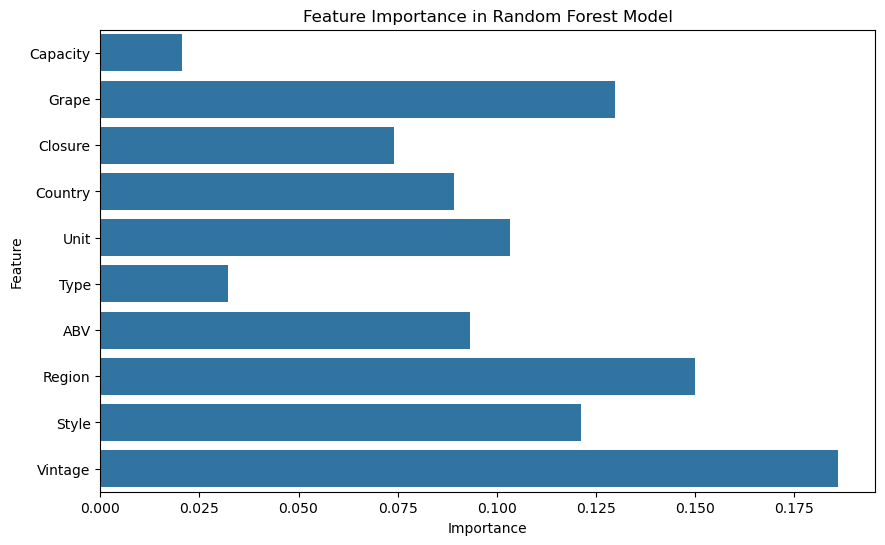

In [165]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


categorical_cols = ['Grape', 'Closure', 'Country', 'Unit', 'Type', 'Region', 'Style', 'Vintage']
label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=["Price", "Price_Category", "Price_Category_Encoded"])
y = df["Price_Category_Encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of RandomForestClassifier: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

feature_importance = rf_classifier.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


# Evaluation

## Metrics:
1.) **Accuracy**: The overall accuracy of the model is **0.72**, which correctly provided the price category for the wine **72%** of the wines in the dataset

2.) **Precision, Recall, F1-Score**:
 - **Low**: This was the model's best section with an 81% precision score, 78% recall score, and an 80% F1-score.
 - **Medium**: The model performed moderately in this section with a 63% precision score, 74% recall score, and a 68% F1-score.
 - **Premium**: The model had the most trouble with this section, with a 74% precision score but only a 50% recall score and 60% F1 Score.
   
3.) **Conclusion**:
- The model generally did a good job classifying low —and medium-priced wines but struggled with Premium wines, seemingly due to the class imbalance (fewer Premium wines in the dataset).
- Looking at the **macro average** gives a balanced view across all categories, whereas the **weighted average** includes any imbalances and showcases a more raw performance average.

The evaluation shows that there is room for improvement regarding the Premium price classification, but overall, the model was effective in classifying most of the dataset. 


# Storytelling: Insights from the Data  

Using the **Wine Dataset by Elvin Rustamov**, we built a model to classify wines into **Low, Medium, and Premium** price categories based on features like **grape variety, region, closure type, and alcohol content**. The **RandomForestClassifier** achieved **72% accuracy**, showcasing that wine characteristics can  predict price through factors such as branding and marketing.  

### Key Insights  
- **Grape variety and region** were among the strongest price indicators.  
- **Closure type (cork vs. screwcap)** also showed some correlation with pricing.  
- The model performed best at distinguishing **Low and Medium** price wines but had more difficulty with **Premium wines**, likely due to fewer samples in this category.  

Ultimately, while the model helps simplify wine pricing, it does not fully account for factors like branding and consumer preferences.  


## Impact of the Project  

### Potential Benefits  
- **Customers** can use this model to understand better how wine characteristics affect price.  
- **Retailers and distributors** can use it for pricing and inventory decisions.  
- **Winemakers** may identify trends in what contributes to higher-priced wines.  

### Possible Downsides  
- **Bias in pricing**: If the data isn’t diverse, the model might just repeat current pricing trends instead of finding new ones.  
- **Limited pricing factors**: The model does not account for branding, marketing, or expert ratings, which are impactful in real-world pricing.  
- **Potential impact on smaller wineries**: If pricing becomes too data-driven, unique wineries might be disadvantaged.  


## References  
- [Wine Dataset by Elvin Rustamov](https://www.kaggle.com/datasets/elvinrustam/wine-dataset)  